In [3]:
import os, sys
from pathlib import Path

# Get the absolute path to the project root (two levels up from this notebook)
project_root = Path(__file__).resolve().parents[2] if "__file__" in globals() else Path(os.getcwd()).parents[1]
sys.path.append(str(project_root))

print("Project root added to path:", project_root)


import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing.preprocess import load_raw_data, clean_data, train_val_test_split
from src.models.baseline import majority_class_baseline, logistic_regression_pipeline


Project root added to path: /home/rolljake/cmse492_aml/cmse492_project


In [4]:
DATA_PATH = Path("../../data/raw/adult.data")

df_raw = load_raw_data(DATA_PATH)

print("Raw shape:", df_raw.shape)
display(df_raw.head())
display(df_raw.dtypes)


Raw shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
df_clean = clean_data(df_raw)
print("After cleaning:", df_clean.shape)
display(df_clean.head())

processed_dir = Path("../../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

sample_path = processed_dir / "adult_sample.csv"
df_clean.sample(1000, random_state=0).to_csv(sample_path, index=False)
print("Saved sample:", sample_path)


After cleaning: (32561, 16)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_binary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


Saved sample: ../../data/processed/adult_sample.csv


Saved: ../../figures/feature_distributions.png


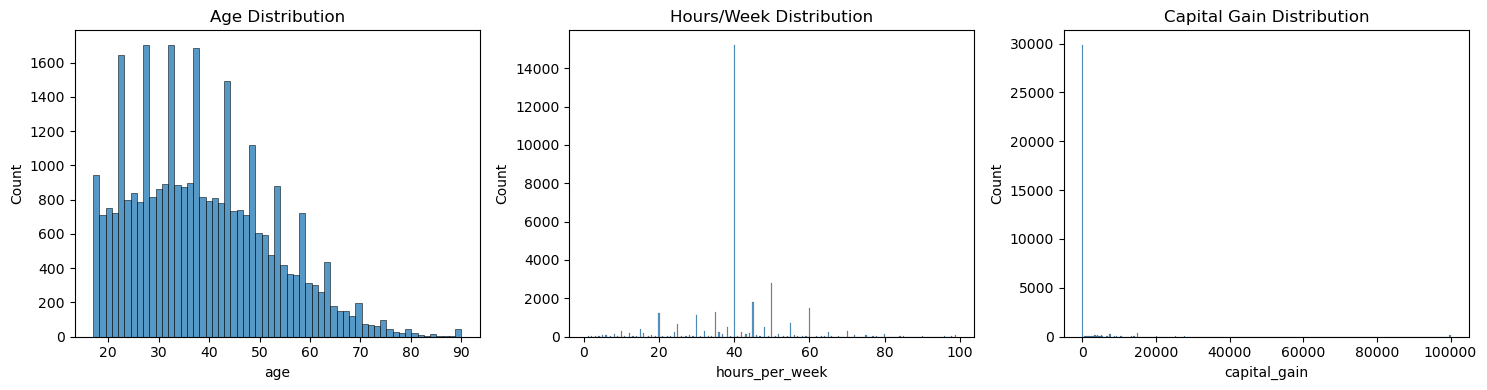

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.histplot(df_clean["age"], kde=False, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df_clean["hours_per_week"], kde=False, ax=axes[1])
axes[1].set_title("Hours/Week Distribution")

sns.histplot(df_clean["capital_gain"], kde=False, ax=axes[2])
axes[2].set_title("Capital Gain Distribution")

plt.tight_layout()

figures_dir = Path("../../figures")
figures_dir.mkdir(parents=True, exist_ok=True)
out_path = figures_dir / "feature_distributions.png"
plt.savefig(out_path, dpi=300)
print("Saved:", out_path)
plt.show()


Saved: ../../figures/class_balance.png


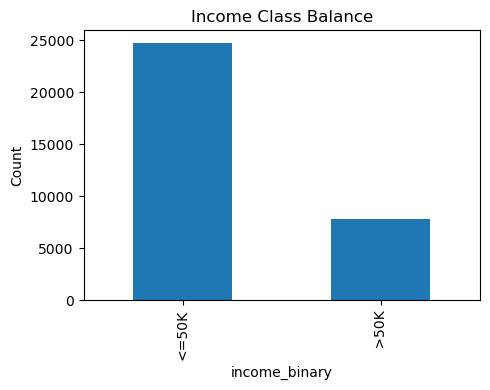

In [7]:
fig, ax = plt.subplots(figsize=(5,4))
df_clean["income_binary"].value_counts().plot(kind="bar", ax=ax)
ax.set_xticklabels(["<=50K"," >50K"])
ax.set_ylabel("Count")
ax.set_title("Income Class Balance")
plt.tight_layout()
out_path = figures_dir / "class_balance.png"
plt.savefig(out_path, dpi=300)
print("Saved:", out_path)
plt.show()


Saved: ../../figures/pair_relationships.png


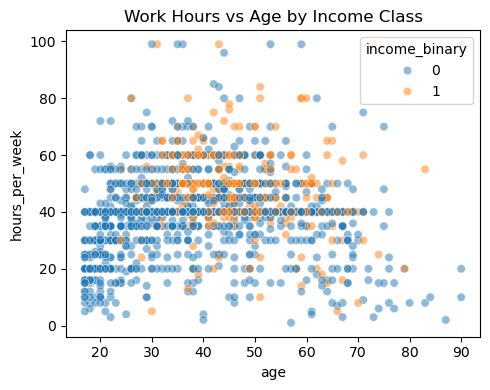

In [8]:
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(
    data=df_clean.sample(2000, random_state=0),
    x="age",
    y="hours_per_week",
    hue="income_binary",
    alpha=0.5,
    ax=ax
)
ax.set_title("Work Hours vs Age by Income Class")
plt.tight_layout()
out_path = figures_dir / "pair_relationships.png"
plt.savefig(out_path, dpi=300)
print("Saved:", out_path)
plt.show()


Saved: ../../figures/missing_values.png


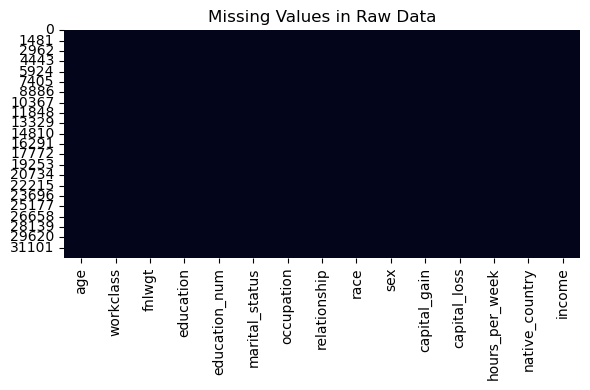

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(df_raw.isna(), cbar=False, ax=ax)
ax.set_title("Missing Values in Raw Data")
plt.tight_layout()
out_path = figures_dir / "missing_values.png"
plt.savefig(out_path, dpi=300)
print("Saved:", out_path)
plt.show()


In [10]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df_clean)
print("Train:", X_train.shape,
      "Val:", X_val.shape,
      "Test:", X_test.shape)


Train: (22792, 15) Val: (3256, 15) Test: (6513, 15)


In [11]:
majority_acc, majority_label = majority_class_baseline(y_train, y_test)
print("Majority-class baseline accuracy:", majority_acc)
print("Predicted class for everyone:", majority_label)


Majority-class baseline accuracy: 0.7592507293106096
Predicted class for everyone: 0


In [12]:
logreg_acc, logreg_report = logistic_regression_pipeline(X_train, X_test, y_train, y_test)
print("Logistic regression accuracy:", logreg_acc)
print(logreg_report)


Logistic regression accuracy: 0.8550591125441425
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.62      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

